In [2]:
import math
import json
import random
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
from jamo import h2j, j2hcj
from tqdm import tqdm
from pprint import pprint

In [3]:
# 한글 키보드 좌표 초기 세팅
# ㅂ:0 ㅁ:1 ㅋ:2 ㅈ:3 ㄴ:4 ...

KEY_WIDTH = 94
MIDDLE_OFFSET = 24
BOTTOM_OFFSET = 71
offsets = [0, MIDDLE_OFFSET, BOTTOM_OFFSET]

coords = {}

for i in range(30):
    row = i%3
    column = math.floor(i/3)
    x = column*KEY_WIDTH + offsets[row]
    y = row*KEY_WIDTH
    coords[i] = (x, y)

coords

{0: (0, 0),
 1: (24, 94),
 2: (71, 188),
 3: (94, 0),
 4: (118, 94),
 5: (165, 188),
 6: (188, 0),
 7: (212, 94),
 8: (259, 188),
 9: (282, 0),
 10: (306, 94),
 11: (353, 188),
 12: (376, 0),
 13: (400, 94),
 14: (447, 188),
 15: (470, 0),
 16: (494, 94),
 17: (541, 188),
 18: (564, 0),
 19: (588, 94),
 20: (635, 188),
 21: (658, 0),
 22: (682, 94),
 23: (729, 188),
 24: (752, 0),
 25: (776, 94),
 26: (823, 188),
 27: (846, 0),
 28: (870, 94),
 29: (917, 188)}

In [4]:
# 두 개의 키 사이 거리 계산

def distance(first, second):
    return math.hypot(second[0] - first[0], second[1] - first[1])

# test
print(distance(coords[0], coords[0]))
print(distance(coords[0], coords[29]))

0.0
936.0731808998696


In [5]:
# 한 손가락으로 누를 수 있는 키 정의

# 8개 손가락 사용
keys_per_finger = [[0,1,2], [3,4,5], [6,7,8], [9,10,11,12,13,14], [15,16,17,18,19,20], [21,22,23], [24,25,26], [27,28,29]]

# 2개 손가락 사용
# keys_per_finger = [[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], [15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]]

# 1개 손가락 사용
# keys_per_finger = [[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]]

distances = {i: {} for i in range(30)}

for keys in keys_per_finger:
    for i in keys:
        for j in keys:
            distances[i][j] = distance(coords[i], coords[j]) / KEY_WIDTH

distances

{0: {0: 0.0, 1: 1.0320793902668004, 2: 2.1378744155702085},
 1: {0: 1.0320793902668004, 1: 0.0, 2: 1.118033988749895},
 2: {0: 2.1378744155702085, 1: 1.118033988749895, 2: 0.0},
 3: {3: 0.0, 4: 1.0320793902668004, 5: 2.1378744155702085},
 4: {3: 1.0320793902668004, 4: 0.0, 5: 1.118033988749895},
 5: {3: 2.1378744155702085, 4: 1.118033988749895, 5: 0.0},
 6: {6: 0.0, 7: 1.0320793902668004, 8: 2.1378744155702085},
 7: {6: 1.0320793902668004, 7: 0.0, 8: 1.118033988749895},
 8: {6: 2.1378744155702085, 7: 1.118033988749895, 8: 0.0},
 9: {9: 0.0,
  10: 1.0320793902668004,
  11: 2.1378744155702085,
  12: 1.0,
  13: 1.604938056650733,
  14: 2.6610421482235114},
 10: {9: 1.0320793902668004,
  10: 0.0,
  11: 1.118033988749895,
  12: 1.2468157722539244,
  13: 1.0,
  14: 1.8027756377319948},
 11: {9: 2.1378744155702085,
  10: 1.118033988749895,
  11: 0.0,
  12: 2.01491159083403,
  13: 1.118033988749895,
  14: 1.0},
 12: {9: 1.0,
  10: 1.2468157722539244,
  11: 2.01491159083403,
  12: 0.0,
  13: 1.

In [6]:
# 손가락의 초기 위치 설정
# 0:왼손 새끼 1:왼손 약지 2:왼손 중지 3:왼손 검지 4:오른손 검지 5:오른손 중지 6:오른손 약지 7:오른손 새끼

# 8개 손가락 사용
home_key_pos = [1, 4, 7, 10, 19, 22, 25, 28]

# 2개 손가락 사용
# home_key_pos = [7, 22]

# 1개 손가락 사용
# home_key_pos = [16]
home_keys = {}
for i, keys in enumerate(keys_per_finger):
    for key in keys:
        home_keys[key] = home_key_pos[i]

home_keys

{0: 1,
 1: 1,
 2: 1,
 3: 4,
 4: 4,
 5: 4,
 6: 7,
 7: 7,
 8: 7,
 9: 10,
 10: 10,
 11: 10,
 12: 10,
 13: 10,
 14: 10,
 15: 19,
 16: 19,
 17: 19,
 18: 19,
 19: 19,
 20: 19,
 21: 22,
 22: 22,
 23: 22,
 24: 25,
 25: 25,
 26: 25,
 27: 28,
 28: 28,
 29: 28}

In [7]:
# 유전자를 키보드 Dict로 반환하는 함수
# shift 눌렀을 때 글자 포함

kb = 'ㅂㅁㅋㅈㄴㅌㄷㅇㅊㄱㄹㅍㅅㅎㅠㅛㅗㅜㅕㅓㅡㅑㅏ,ㅐㅣ.ㅔ;/'

def genome_to_keyboard(genome):
    keyboard = {}
    for i, char in enumerate(genome):
        keyboard[char] = i
        
        if char == 'ㅂ':
            keyboard['ㅃ'] = i # shift 눌렀을 때 글자 같은 키에 매칭
        elif char == 'ㅈ':
            keyboard['ㅉ'] = i
        elif char == 'ㄷ':
            keyboard['ㄸ'] = i
        elif char == 'ㄱ':
            keyboard['ㄲ'] = i
        elif char == 'ㅅ':
            keyboard['ㅆ'] = i
        elif char == 'ㅐ':
            keyboard['ㅒ'] = i
        elif char == 'ㅔ':
            keyboard['ㅖ'] = i
        elif char == ',':
            keyboard['<'] = i
        elif char == '.':
            keyboard['>'] = i
        elif char == ';':
            keyboard[':'] = i
        elif char == '/':
            keyboard['?'] = i
    return keyboard

genome_to_keyboard(kb)

{'ㅂ': 0,
 'ㅃ': 0,
 'ㅁ': 1,
 'ㅋ': 2,
 'ㅈ': 3,
 'ㅉ': 3,
 'ㄴ': 4,
 'ㅌ': 5,
 'ㄷ': 6,
 'ㄸ': 6,
 'ㅇ': 7,
 'ㅊ': 8,
 'ㄱ': 9,
 'ㄲ': 9,
 'ㄹ': 10,
 'ㅍ': 11,
 'ㅅ': 12,
 'ㅆ': 12,
 'ㅎ': 13,
 'ㅠ': 14,
 'ㅛ': 15,
 'ㅗ': 16,
 'ㅜ': 17,
 'ㅕ': 18,
 'ㅓ': 19,
 'ㅡ': 20,
 'ㅑ': 21,
 'ㅏ': 22,
 ',': 23,
 '<': 23,
 'ㅐ': 24,
 'ㅒ': 24,
 'ㅣ': 25,
 '.': 26,
 '>': 26,
 'ㅔ': 27,
 'ㅖ': 27,
 ';': 28,
 ':': 28,
 '/': 29,
 '?': 29}

In [8]:
# 복합자음, 복합모음 분리 함수

def split_double_jamo(word):
    jamo = j2hcj(h2j(word))
    dic = {
        'ㅘ': 'ㅗㅏ', 'ㅙ': 'ㅗㅐ', 'ㅚ': 'ㅗㅣ', 'ㅝ': 'ㅜㅓ',
        'ㅞ': 'ㅜㅔ', 'ㅟ': 'ㅜㅣ', 'ㅢ': 'ㅡㅣ',
        'ㄳ': 'ㄱㅅ', 'ㄵ': 'ㄴㅈ', 'ㄶ': 'ㄴㅎ', 'ㄺ': 'ㄹㄱ',
        'ㄻ': 'ㄹㅁ', 'ㄼ': 'ㄹㅂ', 'ㄽ': 'ㄹㅅ', 'ㄾ': 'ㄹㅌ', 
        'ㄿ': 'ㄹㅍ', 'ㅀ': 'ㄹㅎ', 'ㅄ': 'ㅂㅅ'}

    for i in jamo:
        if i in dic.keys():
            jamo = jamo.replace(i,dic[i])
    return jamo

split_double_jamo('값싼원두')

'ㄱㅏㅂㅅㅆㅏㄴㅇㅜㅓㄴㄷㅜ'

In [11]:
# 데이터 전처리

JSON_FILE_PATH = 'train/개인및관계.json'
DATA_LIMIT = 240_000

full_text = ''
legal_chars = 'ㅂㅃㅁㅋㅈㅉㄴㅌㄷㄸㅇㅊㄱㄲㄹㅍㅅㅆㅎㅠㅛㅗㅜㅕㅓㅡㅑㅏ,<ㅐㅒㅣ.>ㅔㅖ;:/? '

count = 0

with open(JSON_FILE_PATH, encoding="UTF8") as f:
    data = json.load(f)
    
    for d in tqdm(data['data']):
        if len(full_text) > DATA_LIMIT:
            break

        for body in d['body']:
            if body['utterance'].startswith('#@'): # 사진, 동영상 등 제거
                continue

            text = body['utterance'].replace('\n', ' ').strip()
            
            jamo_text = split_double_jamo(text)
            
            if any(char not in legal_chars for char in jamo_text): # 숫자, 영어 제거
                continue

            full_text += ' ' + jamo_text
            count += 1

print(count)
print(len(full_text))

  0%|          | 931/511496 [00:01<10:50, 784.28it/s]

12572
240013


In [12]:
print(full_text[:50])

 ㅂㅓㄴㅎㅗㅏㄱㅏㅊㅏㅈㅇㅏㅆㅇㅓ..ㅜㅜ ㅇㅣㅇㅜㅜ ㅎㅓㄹ ㅠㅠ ㅇㅓㄴㄴㅓㅇㅎㅗㅌㅔㄹㄷㅡㄹㄱ


In [27]:
def total_distance(input_string, keyboard):
    input_string = split_double_jamo(input_string.strip())
    input_string = input_string.replace(' ', '')

    first_char = input_string[0]
    first_pos = keyboard[first_char]
    first_home_key = home_keys[first_pos]
    total_dist = distances[first_home_key][first_pos]

    for i in range(0, len(input_string)-1):
        cur_char = input_string[i]
        next_char = input_string[i+1]
        cur_pos = keyboard[cur_char]
        next_pos = keyboard[next_char]

        if cur_pos in distances and next_pos in distances[cur_pos]:
            total_dist += distances[cur_pos][next_pos]
        else:
            home_key = home_keys[next_pos]
            total_dist += distances[home_key][next_pos]

    return total_dist

# test
total_distance('김민주', genome_to_keyboard(kb))

4.128317561067202

In [14]:
total_distance(full_text, genome_to_keyboard(kb))

105881.24669741193

In [15]:
# 유전 알고리즘 구현

# 첫 세대 유전자 생성
def init_population(pop_size):
    keyboard_chars = list('ㅂㅁㅋㅈㄴㅌㄷㅇㅊㄱㄹㅍㅅㅎㅠㅛㅗㅜㅕㅓㅡㅑㅏ,ㅐㅣ.ㅔ;/')
    population = []
    for i in range(pop_size):
        rand_gnome = keyboard_chars[:]
        random.shuffle(rand_gnome)
        population.append(rand_gnome)
    return population

test_genomes = init_population(2)

test_genomes

[['ㅁ',
  'ㅏ',
  'ㅊ',
  'ㅛ',
  'ㅐ',
  'ㅗ',
  'ㅠ',
  'ㅅ',
  'ㅕ',
  'ㅂ',
  'ㅇ',
  'ㄷ',
  '.',
  ';',
  'ㅍ',
  '/',
  'ㅑ',
  'ㅓ',
  'ㅔ',
  'ㅈ',
  'ㅡ',
  'ㅋ',
  'ㅎ',
  'ㄹ',
  'ㄱ',
  'ㅜ',
  'ㅣ',
  'ㅌ',
  ',',
  'ㄴ'],
 ['ㅅ',
  'ㅜ',
  'ㅐ',
  'ㅍ',
  'ㅎ',
  'ㅑ',
  'ㄱ',
  'ㅔ',
  '.',
  'ㅊ',
  '/',
  'ㅗ',
  'ㅈ',
  'ㄹ',
  'ㅂ',
  'ㅣ',
  'ㅠ',
  'ㄷ',
  'ㅁ',
  'ㅡ',
  'ㅏ',
  'ㅋ',
  'ㅕ',
  'ㅌ',
  ';',
  'ㅓ',
  'ㄴ',
  'ㅛ',
  ',',
  'ㅇ']]

In [16]:
# 두 개의 키보드를 결합

def mate(board1, board2, mutation_rate):
    keyboard_size = len(board1)
    idx = random.randint(0, keyboard_size-1)
    length = random.randint(0, keyboard_size-1)
    child = ['_' for i in range(keyboard_size)]

    for i in range(length):
        if idx > keyboard_size-1:
            idx = 0
        child[idx] = board1[idx]
        idx += 1

    child_idx = idx

    while '_' in child:
        if idx > keyboard_size-1:
            idx = 0
        if child_idx > keyboard_size-1:
            child_idx = 0
        char = board2[idx]
        if char in child:
            idx += 1
            continue
        child[child_idx] = board2[idx]
        child_idx += 1
        idx += 1
        
    prob = random.random()

    if prob < mutation_rate:
        point1 = random.randint(0, 29)
        point2 = random.randint(0, 29)
        allele1 = child[point1]
        allele2 = child[point2]
        child[point1] = allele2
        child[point2] = allele1
        
    return child

mate(test_genomes[0], test_genomes[1], 0.1)

['ㅁ',
 'ㅏ',
 'ㅊ',
 'ㅛ',
 'ㅐ',
 'ㅗ',
 'ㅠ',
 'ㅅ',
 'ㅕ',
 'ㅂ',
 'ㅇ',
 'ㄷ',
 'ㅈ',
 'ㅡ',
 'ㅋ',
 ';',
 'ㅓ',
 'ㅍ',
 'ㅎ',
 'ㅑ',
 'ㅔ',
 '.',
 '/',
 'ㄹ',
 'ㄱ',
 'ㅜ',
 'ㅣ',
 'ㅌ',
 ',',
 'ㄴ']

In [17]:
# 현 세대 평가
# Fitness 적합도 == Total distance

def get_evals(population):
    evals = {}

    for i, genome in enumerate(population):
        keyboard = genome_to_keyboard(genome)
        dist = total_distance(full_text, keyboard)
        evals[i] = dist

    sorted_evals = [k for k, v in sorted(evals.items(), key=lambda item: item[1])]

    return evals, sorted_evals

get_evals(test_genomes)

({0: 142878.3208284411, 1: 190371.27842529828}, [0, 1])

In [18]:
# 다음 세대 생성

def new_generation(population, sorted_evals, p_size, mutation_rate):
    new_gen = []
    sorted_population = []

    for i in sorted_evals:
        sorted_population.append(population[i])
        
    for i in range(int(p_size*0.1)):
        new_gen.append(sorted_population[i])

    for _ in range(int(p_size*0.9)):
        p1 = random.choice(sorted_population[:int(p_size*0.5)])
        p2 = random.choice(sorted_population[:int(p_size*0.5)])
        child = mate(p1, p2, mutation_rate)
        new_gen.append(child)
    
    return new_gen

new_generation(test_genomes, sorted_evals=[1, 0], p_size=10, mutation_rate=0.1)

[['ㅅ',
  'ㅜ',
  'ㅐ',
  'ㅍ',
  'ㅎ',
  'ㅑ',
  'ㄱ',
  'ㅔ',
  '.',
  'ㅊ',
  '/',
  'ㅗ',
  'ㅈ',
  'ㄹ',
  'ㅂ',
  'ㅣ',
  'ㅠ',
  'ㄷ',
  'ㅁ',
  'ㅡ',
  'ㅏ',
  'ㅋ',
  'ㅕ',
  'ㅌ',
  ';',
  'ㅓ',
  'ㄴ',
  'ㅛ',
  ',',
  'ㅇ'],
 ['ㅁ',
  'ㅏ',
  'ㅊ',
  'ㅛ',
  'ㅐ',
  'ㅗ',
  'ㅠ',
  'ㅅ',
  'ㅕ',
  'ㅂ',
  'ㅇ',
  'ㄷ',
  '.',
  ';',
  'ㅍ',
  '/',
  'ㅑ',
  'ㅓ',
  'ㅔ',
  'ㅈ',
  'ㅡ',
  'ㅋ',
  'ㅎ',
  'ㄹ',
  'ㄱ',
  'ㅜ',
  'ㅣ',
  'ㅌ',
  ',',
  'ㄴ'],
 ['ㅅ',
  'ㅜ',
  'ㅐ',
  'ㅍ',
  'ㅎ',
  'ㅑ',
  'ㅠ',
  'ㅕ',
  'ㅂ',
  'ㄷ',
  '.',
  '/',
  'ㅔ',
  'ㅈ',
  'ㅡ',
  'ㅋ',
  'ㄹ',
  'ㄱ',
  'ㅣ',
  'ㅌ',
  'ㅁ',
  'ㅏ',
  'ㅊ',
  'ㅗ',
  ';',
  'ㅓ',
  'ㄴ',
  'ㅛ',
  ',',
  'ㅇ'],
 ['ㅅ',
  'ㅊ',
  'ㅐ',
  'ㅗ',
  'ㅂ',
  '.',
  'ㅍ',
  '/',
  'ㅑ',
  'ㅔ',
  'ㅈ',
  'ㅎ',
  'ㄹ',
  'ㄱ',
  'ㅜ',
  'ㅣ',
  'ㅠ',
  'ㄷ',
  'ㅁ',
  'ㅡ',
  'ㅏ',
  'ㅋ',
  'ㅕ',
  'ㅌ',
  ';',
  'ㅓ',
  'ㄴ',
  'ㅛ',
  ',',
  'ㅇ'],
 ['ㅔ',
  'ㅊ',
  'ㅈ',
  'ㄹ',
  'ㅣ',
  'ㅗ',
  'ㅠ',
  'ㅅ',
  'ㅕ',
  'ㅂ',
  'ㅇ',
  'ㄷ',
  '.',
  ';',
  'ㅍ',
  '/',
  'ㅁ',
  'ㅡ',
  'ㅏ',
  'ㅋ',
  'ㅌ',
  'ㅓ',
  

In [19]:
#학습

P_SIZE = 100
GENERATIONS = 100
MUTATION_RATE = .1

learning = {
    'generations': {}
}

population = init_population(P_SIZE)

for i in range(GENERATIONS):    
    evals, sorted_evals = get_evals(population)
    sum_evals = 0

    for key in evals:
        sum_evals += evals[key]

    avg_evals = sum_evals/P_SIZE
    learning['generations'][i] = {
        'population': population,
        'best': population[sorted_evals[0]],
        'min': evals[sorted_evals[0]],
        'avg': avg_evals
    }

    print('GEN: {}, AVG: {}, MIN: {}, BEST: {}'.format(i+1, avg_evals, evals[sorted_evals[0]], population[sorted_evals[0]]))
    
    population = new_generation(population, sorted_evals, P_SIZE, MUTATION_RATE)

with open('learning.json', 'w') as fp:
    json.dump(learning, fp)

GEN: 1, AVG: 175611.1825805261, MIN: 132922.61782146795, BEST: ['ㅔ', 'ㅂ', 'ㅓ', 'ㅎ', 'ㄱ', 'ㅍ', 'ㄷ', 'ㅈ', 'ㅡ', 'ㅇ', 'ㅅ', 'ㅗ', ',', 'ㅣ', '.', 'ㅕ', 'ㅋ', 'ㅁ', 'ㅊ', 'ㅑ', 'ㅌ', 'ㅐ', 'ㅏ', 'ㅠ', 'ㅜ', 'ㄹ', ';', '/', 'ㄴ', 'ㅛ']
GEN: 2, AVG: 165916.2893685544, MIN: 110074.39290947534, BEST: ['ㅠ', 'ㄴ', 'ㅍ', 'ㄷ', 'ㄱ', ';', 'ㅗ', 'ㅇ', 'ㅡ', 'ㅌ', 'ㅐ', 'ㅁ', 'ㅊ', ',', 'ㅈ', 'ㅋ', 'ㄹ', 'ㅂ', '.', 'ㅎ', 'ㅓ', 'ㅕ', 'ㅅ', 'ㅔ', 'ㅑ', 'ㅣ', 'ㅜ', '/', 'ㅏ', 'ㅛ']
GEN: 3, AVG: 157976.66413877875, MIN: 110074.39290947534, BEST: ['ㅠ', 'ㄴ', 'ㅍ', 'ㄷ', 'ㄱ', ';', 'ㅗ', 'ㅇ', 'ㅡ', 'ㅌ', 'ㅐ', 'ㅁ', 'ㅊ', ',', 'ㅈ', 'ㅋ', 'ㄹ', 'ㅂ', '.', 'ㅎ', 'ㅓ', 'ㅕ', 'ㅅ', 'ㅔ', 'ㅑ', 'ㅣ', 'ㅜ', '/', 'ㅏ', 'ㅛ']
GEN: 4, AVG: 154268.2619187696, MIN: 110074.39290947534, BEST: ['ㅠ', 'ㄴ', 'ㅍ', 'ㄷ', 'ㄱ', ';', 'ㅗ', 'ㅇ', 'ㅡ', 'ㅌ', 'ㅐ', 'ㅁ', 'ㅊ', ',', 'ㅈ', 'ㅋ', 'ㄹ', 'ㅂ', '.', 'ㅎ', 'ㅓ', 'ㅕ', 'ㅅ', 'ㅔ', 'ㅑ', 'ㅣ', 'ㅜ', '/', 'ㅏ', 'ㅛ']
GEN: 5, AVG: 150308.67532076978, MIN: 110074.39290947534, BEST: ['ㅠ', 'ㄴ', 'ㅍ', 'ㄷ', 'ㄱ', ';', 'ㅗ', 'ㅇ', 'ㅡ', 'ㅌ', 'ㅐ', 'ㅁ', 'ㅊ', ',', 'ㅈ', 'ㅋ'

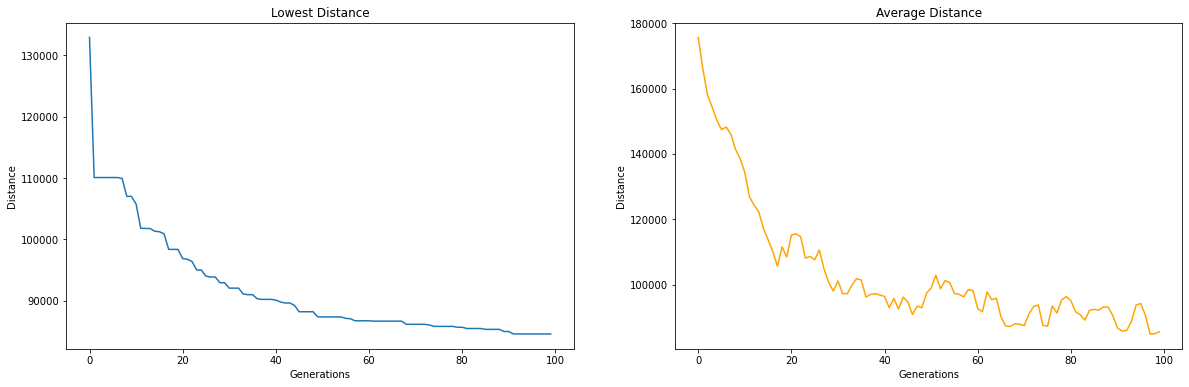

In [20]:
# 학습 결과 시각화

with open('learning.json') as fp:
    learning = json.load(fp)
    
last_dist = 1000000000
min_dists = []
avg_dists = []
generations = len(learning['generations'])

for i in range(0, generations):
    min_dist = learning['generations'][str(i)]['min']
    avg_dist = learning['generations'][str(i)]['avg']
    min_dists.append(min_dist)
    avg_dists.append(avg_dist)
    
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

axes[0].plot(min_dists, label='Lowest Distance')
axes[0].set_xlabel('Generations')
axes[0].set_ylabel('Distance')
axes[0].set_title('Lowest Distance')

axes[1].plot(avg_dists, label='Average Distance', color='orange')
axes[1].set_xlabel('Generations')
axes[1].set_ylabel('Distance')
axes[1].set_title('Average Distance')

plt.show()

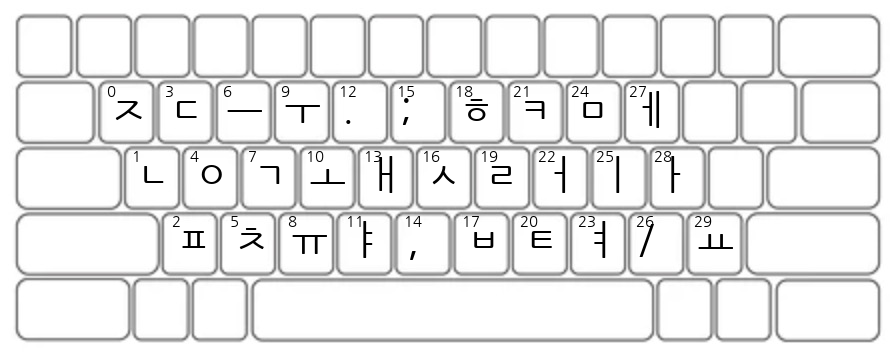

In [22]:
# 가장 효율적인 키보드

kb = learning['generations'][str(GENERATIONS-1)]['best']

with Image.open("template.jpg").convert("RGBA") as base:
    txt = Image.new("RGBA", base.size, (255, 255, 255, 0))

    fnt = ImageFont.truetype("NanumGothic.ttf", 40)
    fnt_index = ImageFont.truetype("NanumGothic.ttf", 15)
    d = ImageDraw.Draw(txt)
    x_offsets = [110, 135, 175]

    for i in range(30):
        row = i%3
        column = math.floor(i/3)
        x = column*58 + x_offsets[row]
        y = row*65 + 85
        char_coords = (x, y)
        index_coords = (x-3, y-3)

        d.text(index_coords, str(i), font=fnt_index, fill=(0, 0, 0, 255))
        d.text(char_coords, kb[i], font=fnt, fill=(0, 0, 0, 255))

    out = Image.alpha_composite(base, txt)

    display(out)